In [1]:
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
print(x_train.shape)
print(y_train.shape)

169001437/169001437 [==============================] - 5s 0us/step
(50000, 32, 32, 3)
(50000, 1)


In [2]:
print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


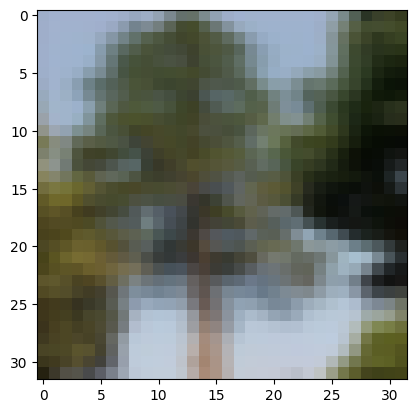

so hinh la: [59]


In [3]:
digit=x_train[2000]
import matplotlib.pyplot as plt
plt.imshow(digit)
plt.show()
print('so hinh la:',y_train[2000])

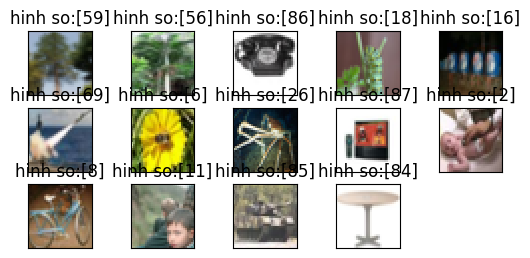

In [6]:
for i in range(14):
   plt.subplot(5,5,i+1)
   plt.tight_layout
   plt.imshow(x_train[i+2000],cmap='gray',interpolation='none')
   plt.title( 'hinh so:{}'.format(y_train[i+2000]))
   plt.xticks([])
   plt.yticks([])

In [7]:
from keras.models import Sequential 
from keras.layers import Dense      
model = Sequential()    
model.add(Dense(512,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 100)               51300     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
Total params: 1,897,432
Trainable params: 1,897,432
Non-trainable params: 0
_________________________________________________________________


In [8]:
x_train = x_train.reshape((50000,32*32*3))  
x_train = x_train.astype('float32')/255   

x_test = x_test.reshape((10000,32*32*3))  
x_test = x_test.astype('float32')/255

print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [9]:
from keras.utils import to_categorical    
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

print(y_train.shape)
print(y_test.shape)

(50000, 100)
(10000, 100)


In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import cifar10
from keras.utils import to_categorical
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',  
              metrics=['accuracy']) 
model.fit(x_train,y_train,epochs=10,batch_size=128)   
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Độ mất mát: ',test_loss)
print('Độ chính xác: ',test_acc)

Epoch 1/10
391/391 [==============================] - 16s 39ms/step - loss: 4.3763 - accuracy: 0.0389
Epoch 2/10
391/391 [==============================] - 15s 38ms/step - loss: 3.9314 - accuracy: 0.0961
Epoch 3/10
391/391 [==============================] - 15s 38ms/step - loss: 3.7183 - accuracy: 0.1334
Epoch 4/10
391/391 [==============================] - 16s 40ms/step - loss: 3.5816 - accuracy: 0.1558
Epoch 5/10
391/391 [==============================] - 16s 41ms/step - loss: 3.4769 - accuracy: 0.1764
Epoch 6/10
391/391 [==============================] - 17s 43ms/step - loss: 3.3802 - accuracy: 0.1923
Epoch 7/10
391/391 [==============================] - 15s 40ms/step - loss: 3.3051 - accuracy: 0.2035
Epoch 8/10
391/391 [==============================] - 15s 39ms/step - loss: 3.2388 - accuracy: 0.2181
Epoch 9/10
391/391 [==============================] - 15s 39ms/step - loss: 3.1757 - accuracy: 0.2281
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 3.3380 

In [12]:
model.save('test.h5')


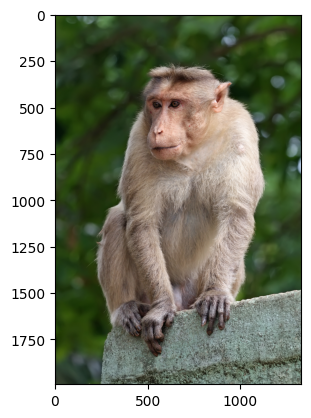

1/1 [==============================] - 0s 170ms/step


array([34])

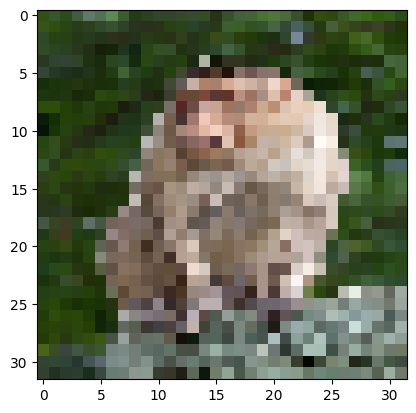

In [13]:

img = plt.imread("Bonnet_macaque,_Bangalore.jpg")
plt.imshow(img)
plt.show()
from keras.utils import load_img, img_to_array
img = load_img("Bonnet_macaque,_Bangalore.jpg", target_size=(32,32))
plt.imshow(img)
import numpy as np
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = -1)